Daily Weather Data:
             Temperature   Humidity  Wind Speed
Timestamp                                     
2024-11-04    25.783333  45.666667    3.086667
2024-11-05    26.078750  44.750000    2.676250
2024-11-06    25.912500  42.625000    2.561250
2024-11-07    25.303750  43.250000    2.428750
2024-11-08    25.047500  43.625000    2.743750
2024-11-09    26.486000  41.200000    2.476000
Monthly Weather Data:
             Temperature  Humidity  Wind Speed
Timestamp                                    
2024-11-30       25.713    43.425       2.623
Seasonal Weather Data:
             Temperature  Humidity  Wind Speed
Timestamp                                    
2024-12-31       25.713    43.425       2.623
Maximum Temperature: 31.40°C
Minimum Temperature: 20.29°C


C:\Users\Prathamesh\AppData\Local\Temp\ipykernel_12124\842118217.py:45: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather_df.fillna(method='ffill', inplace=True)  # Forward-fill missing values
C:\Users\Prathamesh\AppData\Local\Temp\ipykernel_12124\842118217.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  weather_monthly = weather_df[numeric_columns].resample('M').mean()
C:\Users\Prathamesh\AppData\Local\Temp\ipykernel_12124\842118217.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  weather_seasonal = weather_df[numeric_columns].resample('Q').mean()


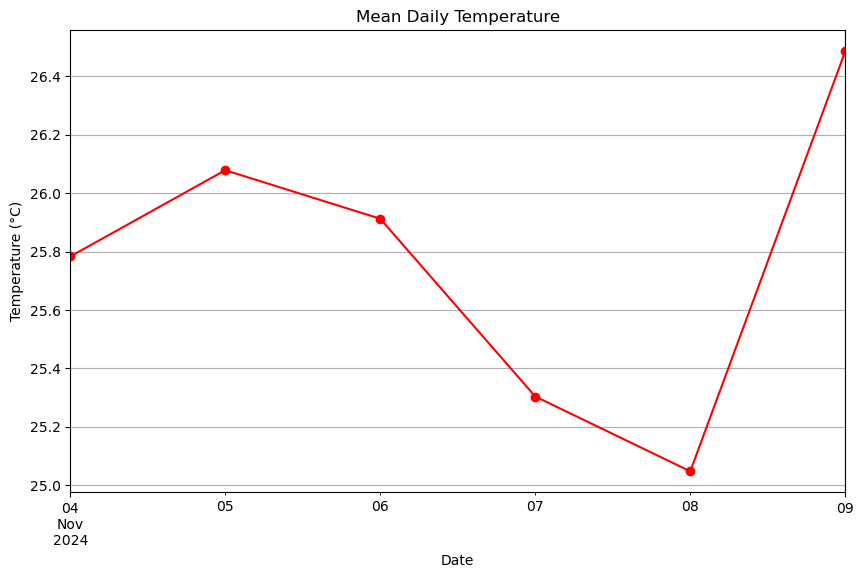

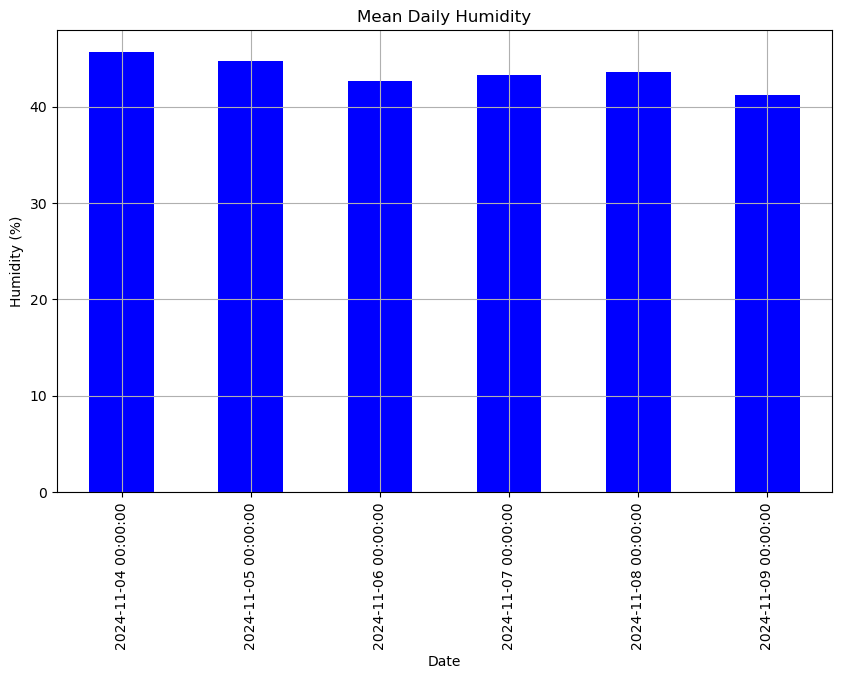

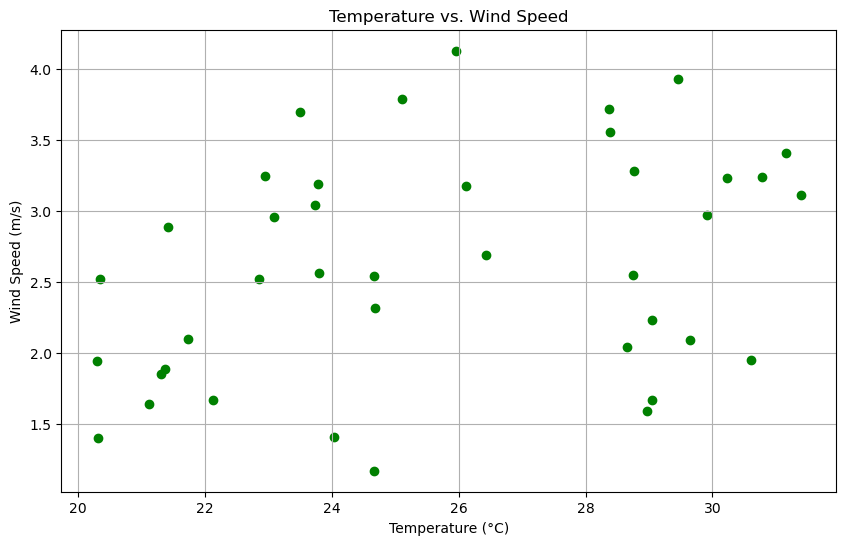

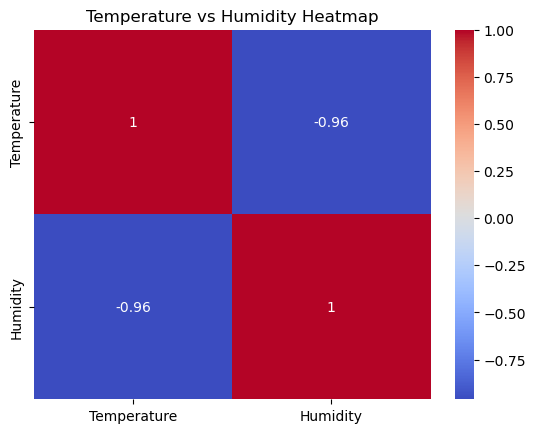

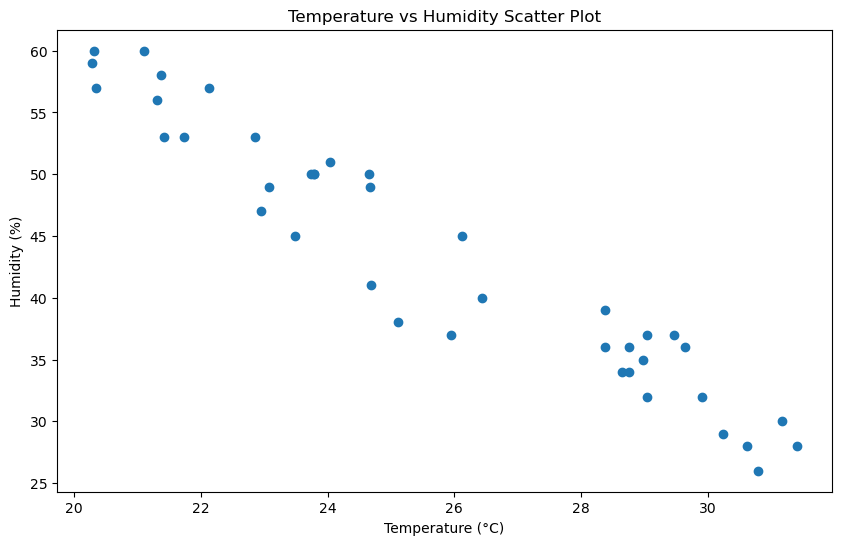

Geospatial map saved as 'weather_map.html'.


In [20]:
import requests
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import folium  # For geospatial visualization

# Set your OpenWeatherMap API key
api_key = 'fb365aa6104829b44455572365ff3b4e'

# Set the location for which you want to retrieve weather data
lat = 18.184135
lon = 74.610764

# Construct the API URL
api_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={api_key}"

# Send a GET request to the API
response = requests.get(api_url)
weather_data = response.json()

# Extract relevant weather attributes using list comprehension
timestamps = [pd.to_datetime(item['dt'], unit='s') for item in weather_data['list']]
temperatures = [item['main']['temp'] for item in weather_data['list']]
humidity = [item['main']['humidity'] for item in weather_data['list']]
wind_speed = [item['wind']['speed'] for item in weather_data['list']]
weather_description = [item['weather'][0]['description'] for item in weather_data['list']]

# Create a DataFrame with the extracted weather data
weather_df = pd.DataFrame({
    'Timestamp': timestamps,
    'Temperature': temperatures,
    'Humidity': humidity,
    'Wind Speed': wind_speed,
    'Description': weather_description
})

# Set the Timestamp as the DataFrame's index
weather_df.set_index('Timestamp', inplace=True)

# Convert temperature from Kelvin to Celsius if needed
weather_df['Temperature'] = weather_df['Temperature'].apply(lambda x: x - 273.15 if x > 200 else x)

# Handling missing values
weather_df.fillna(method='ffill', inplace=True)  # Forward-fill missing values

# Convert all numeric columns to numeric types if they're not already
numeric_columns = ['Temperature', 'Humidity', 'Wind Speed']
weather_df[numeric_columns] = weather_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Calculate daily, monthly, and seasonal means (excluding non-numeric columns)
weather_daily = weather_df[numeric_columns].resample('D').mean()
weather_monthly = weather_df[numeric_columns].resample('M').mean()
weather_seasonal = weather_df[numeric_columns].resample('Q').mean()

# Display the cleaned and preprocessed data
print("Daily Weather Data:\n", weather_daily)
print("Monthly Weather Data:\n", weather_monthly)
print("Seasonal Weather Data:\n", weather_seasonal)

# Maximum and minimum temperatures
max_temp = weather_df['Temperature'].max()
min_temp = weather_df['Temperature'].min()
print(f"Maximum Temperature: {max_temp:.2f}°C")
print(f"Minimum Temperature: {min_temp:.2f}°C")

# Visualization
# Plot mean daily temperature
plt.figure(figsize=(10, 6))
weather_daily['Temperature'].plot(color='red', linestyle='-', marker='o')
plt.title('Mean Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

# Plot mean daily humidity
plt.figure(figsize=(10, 6))
weather_daily['Humidity'].plot(kind='bar', color='blue')
plt.title('Mean Daily Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

# Plot Temperature vs. Wind Speed Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(weather_df['Temperature'], weather_df['Wind Speed'], color='green')
plt.title('Temperature vs. Wind Speed')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()

# Temperature vs Humidity Heatmap
heatmap_data = weather_df[['Temperature', 'Humidity']]
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm')
plt.title('Temperature vs Humidity Heatmap')
plt.show()

# Scatter plot: Temperature vs. Humidity
plt.figure(figsize=(10, 6))
plt.scatter(weather_df['Temperature'], weather_df['Humidity'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs Humidity Scatter Plot')
plt.show()

# Geospatial Visualization (Map)
# Creating a folium map centered on the specified latitude and longitude
weather_map = folium.Map(location=[lat, lon], zoom_start=10)

# Adding a marker for the location with weather information
folium.Marker(
    [lat, lon],
    popup=f"Temperature: {max_temp:.2f}°C\nHumidity: {weather_daily['Humidity'].mean():.2f}%",
    tooltip="Click for weather details"
).add_to(weather_map)

# Save the map to an HTML file
weather_map.save("weather_map.html")
print("Geospatial map saved as 'weather_map.html'.")